In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve



In [3]:
def plot_learning_curve(X, y, estimator, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 5))

    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    axes.grid()

    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.legend(loc="best")
    return axes


Generar dos distribuciones de probabilidad centradas en 5.0, 7.5 con desviación estandar de 2.5 y 1.5 respectivamente. Realizar un gráfico de ambas distribuciones de probabilidad.

a). Emplear el objeto stats.norm y el metodo Probability density function (pdf)

b) Realizar un gráfico de ambas distribuciones

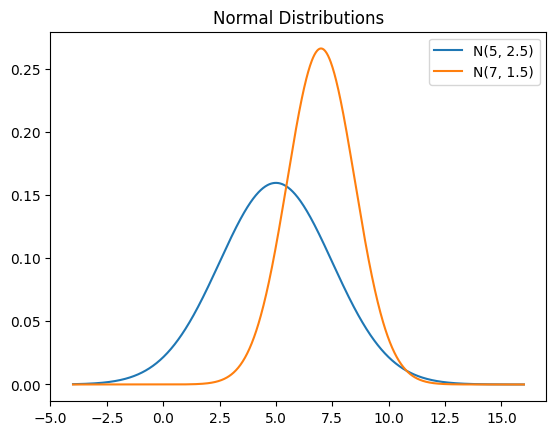

In [4]:
x = np.linspace(6-10, 6+10, 1000)

dist_1 = stats.norm(loc = 5, scale = 2.5)
dist_2 = stats.norm(loc = 7, scale = 1.5)

plt.plot(x, dist_1.pdf(x), label='N(5, 2.5)')
plt.plot(x, dist_2.pdf(x), label='N(7, 1.5)')

plt.title('Normal Distributions')
plt.legend()


¿Qué frontera analítica puede separar los datos?. Determine una expresión analítica en este caso

Se puede emplear el valor absoluto de la resta entre las distribuciones, pues este vallor se hace cero en el punto donde estas se hacen iguales, lo cual sirve como una buena frotera inicial

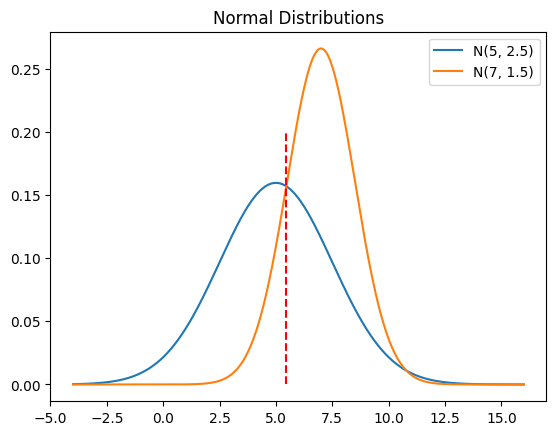

In [5]:
limit = abs(dist_1.pdf(x[300:700]) - dist_2.pdf(x[300:700])).min()
idx = np.where(abs(dist_1.pdf(x) - dist_2.pdf(x)) == limit)

plt.plot(x, dist_1.pdf(x), label='N(5, 2.5)')
plt.plot(x, dist_2.pdf(x), label='N(7, 1.5)')
plt.vlines(x[idx], 0, 0.2, color='red', linestyle='--')
plt.title('Normal Distributions')
plt.legend()

3. Empleando el metodo Random variates(rvs), genere 100 muestas aleatorias para cada distribución, estos seran los datos de entrenamiento

In [6]:
rvs_1 = dist_1.rvs(size=100)
rvs_2 = dist_2.rvs(size=100)

4. Realice un gráfico en el que pueda superponer ambas distribuciones, estas 200 muestas serán las caracteristicas (features) de nuestro data frame, para cada característica tendremos una etiqueta(labels) correspondiente a 0 ó 1.

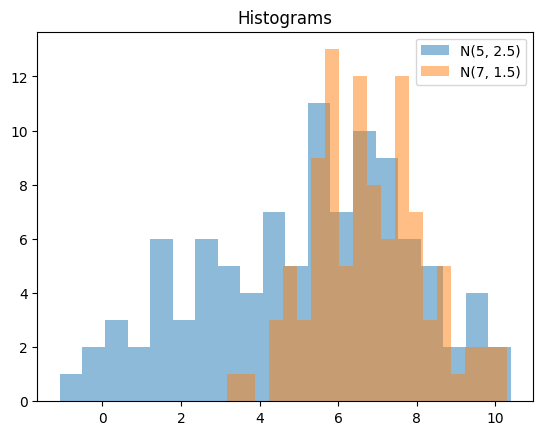

In [7]:
plt.figure()
plt.hist(rvs_1, bins=20, alpha=0.5, label='N(5, 2.5)')
plt.hist(rvs_2, bins=20, alpha=0.5, label='N(7, 1.5)')
plt.title('Histograms')
plt.legend()


5. Con los datos anteriores construya un DataFrame

6.Construye un segundo data frame con 50 datos de test, asociados a las muestras de las dos distribuciones, estos serán los datos de test empleados para validar los algoritmos de clasificación df_test con claves Y, X_1.

In [8]:
features_train = np.concatenate([rvs_1, rvs_2])
labels_train = np.array([0]*100 + [1]*100)
df_train = pd.DataFrame({'feature': features_train, 'label': labels_train})

feature_test = np.concatenate([dist_1.rvs(size=25), dist_2.rvs(size=25)])
labels_test = np.array([0]*25 + [1]*25)
df_test = pd.DataFrame({'feature': feature_test, 'label': labels_test})

7. Por ahora, emplearemos clasificadores bajo un modelo de caja negra. La forma para implementar el modelo es la siguiente:

Definir el modelo y realizar el fit:
clf = LinearRegression()
clf.fit(X_train, Y_train)
Determinar el score de los datos de entrenamiento
score = clf.score(X_train, Y_train)
Determinar el score para los datos de test, ¿que puede concluir mirando los scores?
Nota: Emplear los siguientes clasificadores de machine learning y determinar los score para cada modelo.

 - DecisionTreeClassifier(max_depth=3),
 - SVC(kernel="linear", C=0.025)

In [9]:
clf = LinearRegression()
clf.fit(df_train[['feature']], df_train['label'])
score = clf.score(df_train[['feature']], df_train['label'])
score

0.12751563993167858

Este score indica que el modelo solo es certero en un 16% aproximadamente, lo que es de esperarse, puesto que la regresion lineal es idonea para predecir valores, mas no para clasificar entre caracteristicas distintas

Ahora, usando un modelo de clasificacion como los arboles de decision se tiene

In [10]:
tree = DecisionTreeClassifier()
tree.fit(df_train[['feature']], df_train['label'])
score = tree.score(df_train[['feature']], df_train['label'])
score

1.0

Se observa entonces que para el dataset empleado, un modelo especializado en clasificacion como el arbol de decision logra resultados satisfactorios, obteniedo ahora un 100% de certeza

In [11]:
svc = SVC()
svc.fit(df_train[['feature']], df_train['label'])
score = svc.score(df_train[['feature']], df_train['label'])
score

0.67

Caso similar con el modelo de support vector machines, que logra resultados aceptables con una certeza un 74% aproximadamente

8. Existen librerias que pueden optmizar los hyperparametros de cualquier modelo: GridSearchCV prueba a implementar las siguientes lineas de código con el siguiente modelo:

In [12]:
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8]}
CV_clf = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=10)
CV_clf.fit(df_train[['feature']], df_train['label'])

# Print the best parameters and the best score
print("Mejor parametro: ", CV_clf.best_params_)
print("Mejor puntaje: ", CV_clf.best_score_)

Mejor parametro:  {'max_depth': 3}
Mejor puntaje:  0.615


9. En los algoritmos de machining learning es de suma importancia conocer las curvas de aprendizaje para decidir si el algoritmo funciona de manera optima, emplea las siguiente lineas de código para mostrar las curvas de aprendizaje de la regresion lineal.

10. Prueba a construir curvas de aprendizaje para los siguientes valores en las distribuciones(emplea una regresion lineal):
Datos de entrenamiento 30. media1=7.5, media2=10, desv1=1, desv1=1
Datos de entrenamiento 100. media1=7.5, media2=10, desv1=1, desv1=1
Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 2, desv1 = 2
Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 0.5, desv1 = 0.5

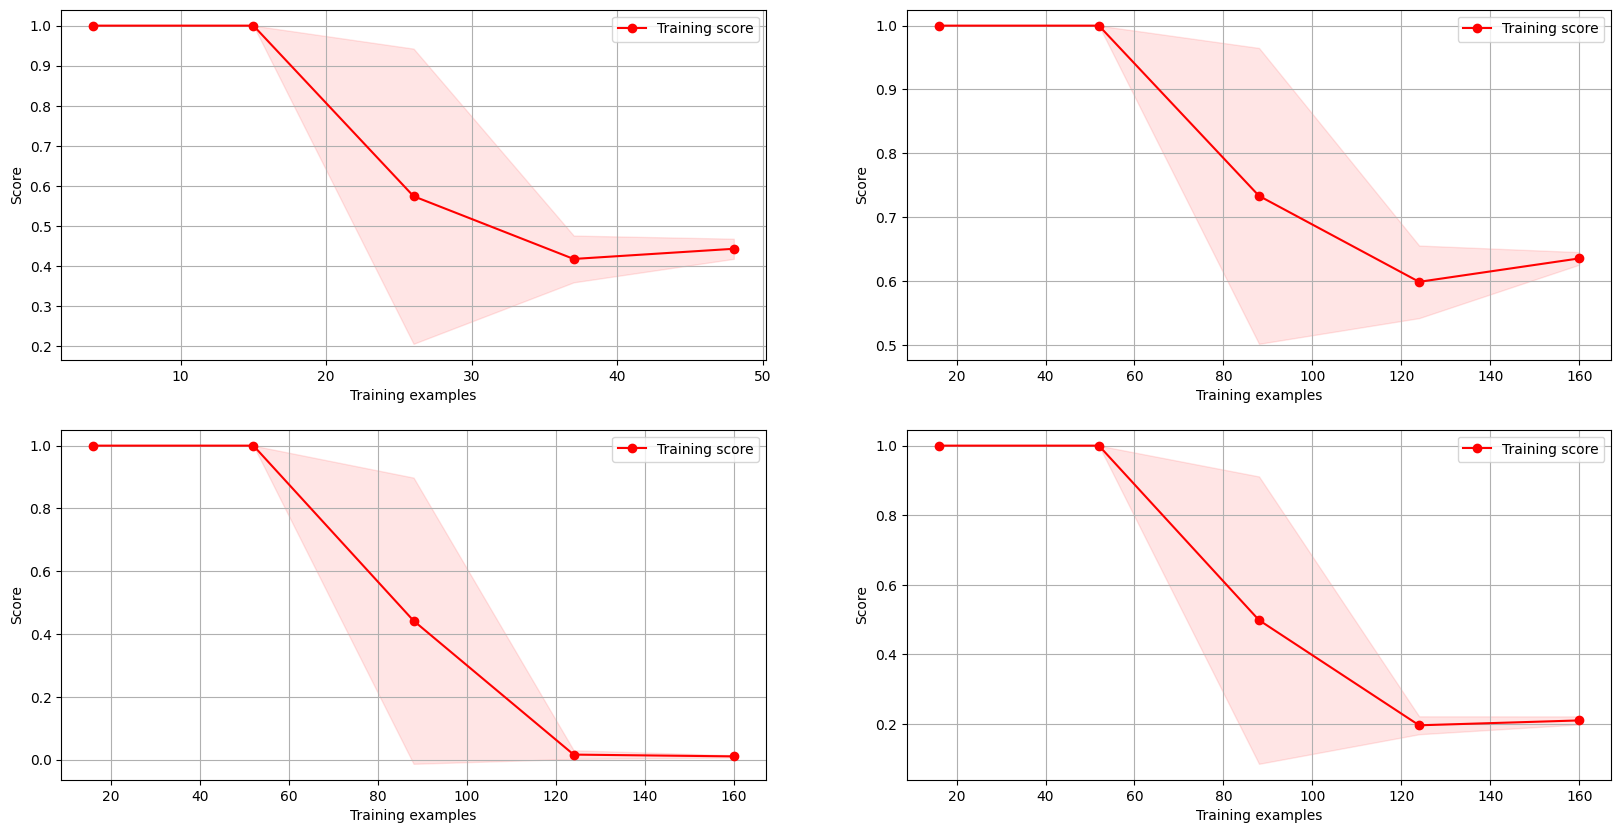

In [13]:
# Generar datos y graficar curvas de aprendizaje
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Datos de entrenamiento 30. media1=7.5, media2=10, desv1=1, desv1=1
dist_1 = stats.norm(loc=7.5, scale=1)
dist_2 = stats.norm(loc=10, scale=1)
rvs_1 = dist_1.rvs(size=30)
rvs_2 = dist_2.rvs(size=30)
features_train = np.concatenate([rvs_1, rvs_2])
labels_train = np.array([0]*30 + [1]*30)
df_train = pd.DataFrame({'feature': features_train, 'label': labels_train})
plot_learning_curve(df_train[['feature']], df_train['label'], LinearRegression(), axes=axes[0, 0], cv=5)

# Datos de entrenamiento 100. media1=7.5, media2=10, desv1=1, desv1=1
rvs_1 = dist_1.rvs(size=100)
rvs_2 = dist_2.rvs(size=100)
features_train = np.concatenate([rvs_1, rvs_2])
labels_train = np.array([0]*100 + [1]*100)
df_train = pd.DataFrame({'feature': features_train, 'label': labels_train})
plot_learning_curve(df_train[['feature']], df_train['label'], LinearRegression(), axes=axes[0, 1], cv=5)

# Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1=2, desv1=2
dist_2 = stats.norm(loc=7.0, scale=2)
rvs_1 = dist_1.rvs(size=100)
rvs_2 = dist_2.rvs(size=100)
features_train = np.concatenate([rvs_1, rvs_2])
labels_train = np.array([0]*100 + [1]*100)
df_train = pd.DataFrame({'feature': features_train, 'label': labels_train})
plot_learning_curve(df_train[['feature']], df_train['label'], LinearRegression(), axes=axes[1, 0], cv=5)

# Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1=0.5, desv1=0.5
dist_1 = stats.norm(loc=7.5, scale=0.5)
dist_2 = stats.norm(loc=7.0, scale=0.5)
rvs_1 = dist_1.rvs(size=100)
rvs_2 = dist_2.rvs(size=100)
features_train = np.concatenate([rvs_1, rvs_2])
labels_train = np.array([0]*100 + [1]*100)
df_train = pd.DataFrame({'feature': features_train, 'label': labels_train})
plot_learning_curve(df_train[['feature']], df_train['label'], LinearRegression(), axes=axes[1, 1], cv=5)

plt.show()

Dada la similutud y cercania de las distibuciones, se tienen curvas de aprendizaje similares, que muestran que despues de cierto numero de datos de entrenamiento, el modelo en lugar de mejorar su tasa, decae generando resultados cada vez peores, indicando overfitting.